In [124]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(hrbrthemes)

In [125]:
# load data
df = read.csv('crimerates-by-state-2005.csv')
tail(df)

,state,murder,forcible_rape,robbery,aggravated_assault,burglary,larceny_theft,motor_vehicle_theft,population
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
47,Vermont,1.3,23.3,11.7,83.5,491.8,1686.1,102.9,618814
48,Virginia,6.1,22.7,99.2,154.8,392.1,2035.0,211.1,7563887
49,Washington,3.3,44.7,92.1,205.8,959.7,3149.5,783.9,6261282
50,West Virginia,4.4,17.7,44.6,206.1,621.2,1794.0,210.0,1803920
51,Wisconsin,3.5,20.6,82.2,135.2,440.8,1992.8,226.6,5541443
52,Wyoming,2.7,24.0,15.3,188.1,476.3,2533.9,145.1,506242


In [126]:
# remove unwanted rows
df = df[df$state != 'United States',]
df = df[df$state != 'District of Columbia',]

In [127]:
# select a few columns to keep
short_df = subset(df, select = -c(murder, aggravated_assault, larceny_theft))
head(short_df)

,state,forcible_rape,robbery,burglary,motor_vehicle_theft,population
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2,Alabama,34.3,141.4,953.8,288.3,4545049
3,Alaska,81.1,80.9,622.5,391.0,669488
4,Arizona,33.8,144.4,948.4,924.4,5974834
5,Arkansas,42.9,91.1,1084.6,262.1,2776221
6,California,26.0,176.1,693.3,712.8,35795255
7,Colorado,43.4,84.6,744.8,559.5,4660780


In [128]:
# convert to long
short_df <- short_df %>% 
  gather("crime", "count", -c(state, population))

In [129]:
head(short_df)

,state,population,crime,count
,<chr>,<int>,<chr>,<dbl>
1,Alabama,4545049,forcible_rape,34.3
2,Alaska,669488,forcible_rape,81.1
3,Arizona,5974834,forcible_rape,33.8
4,Arkansas,2776221,forcible_rape,42.9
5,California,35795255,forcible_rape,26.0
6,Colorado,4660780,forcible_rape,43.4


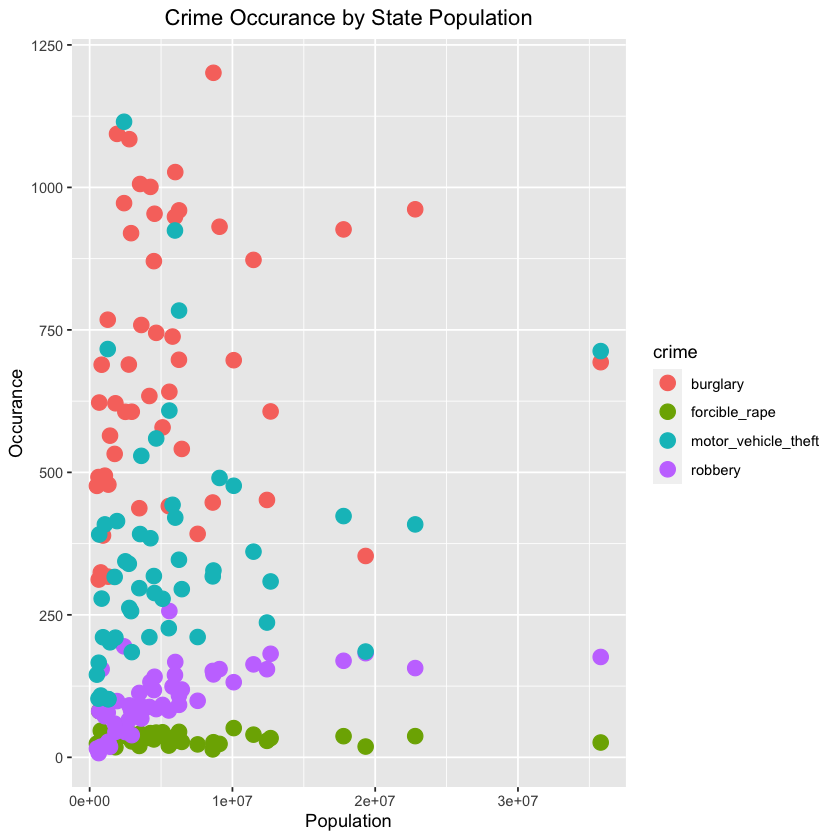

In [130]:
# create scatter with categories
ggplot(short_df, aes(x=population, y=count, color=crime)) + 
    geom_point(size=4) + 
    theme(plot.title = element_text(hjust = 0.5)) +
    ggtitle('Crime Occurance by State Population') +
    labs(y='Occurance', x = 'Population')

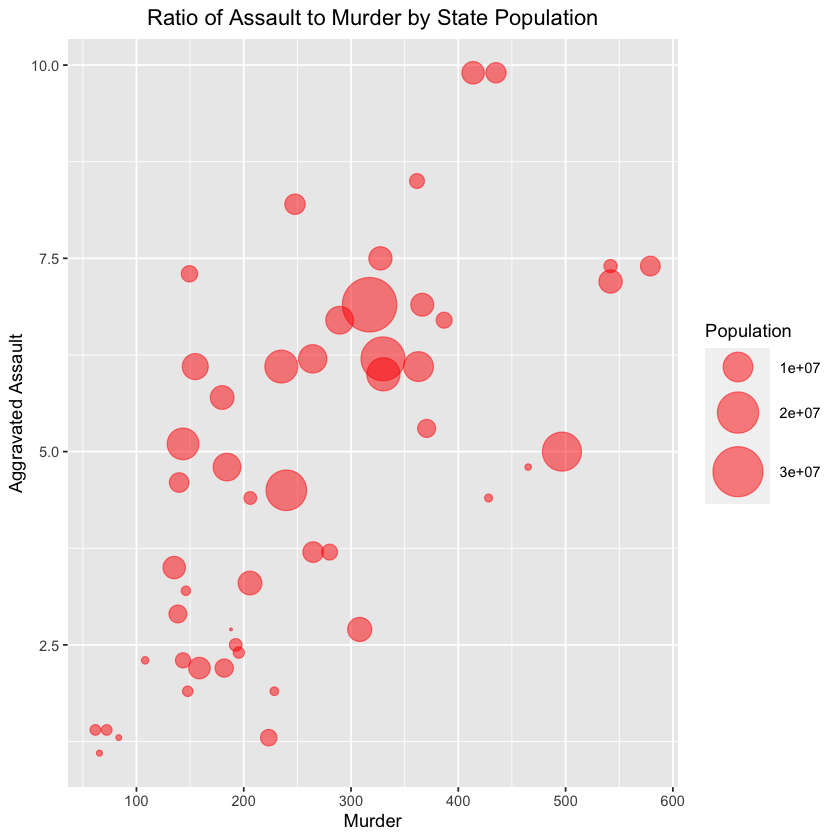

In [131]:
# create bubble chart
ggplot(df, aes(x=aggravated_assault, y=murder, size = population,)) +
    geom_point(alpha=0.5, color='red') +
    theme(plot.title = element_text(hjust = 0.5)) +
    ggtitle('Ratio of Assault to Murder by State Population') +
    scale_size(range = c(.5, 15), name="Population") +
    theme(legend.position="right") +
    ylab('Aggravated Assault') +
    xlab('Murder') 


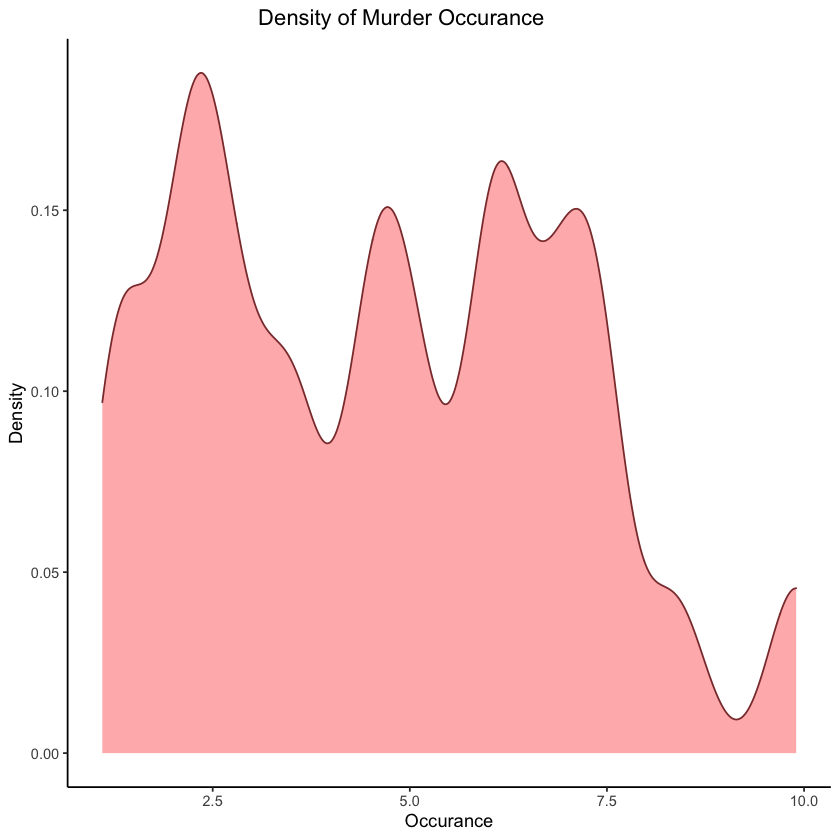

In [132]:
# create density plot
ggplot(df, aes(x=murder)) + 
  geom_density(color='indianred4', fill='indianred1', bw = 0.35, alpha=.5) +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.4)) +
  ggtitle('Density of Murder Occurance') +
  ylab('Density') +
  xlab('Occurance') 
